In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
from google.colab import drive
from datetime import datetime
from math import sin, cos, pi
from sklearn.preprocessing import OneHotEncoder
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import dill
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Data loading

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("/content/drive/MyDrive/datas/data_NonFraude.csv" , sep="," , error_bad_lines=False )

In [6]:
data.head()

,Unnamed: 0,id_x,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,coefBonusMalus,DATE_AFFECTATION,bonus,date_Calcule,dateChangementVehicule,numChassis,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,Marque_vehicule,Usage,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,dateEffetPolice,dateEcheancePolice,dateExpirationPolice,DATE_RESILIATION,Date_Suspenssion,Fraude,Nombre_Sinistre
0,0,32696,32700,29293,26960,26960,3,100,2017-05-11 00:00:00.000000,0,2016-05-11 00:00:00.000000,NaN,VF1LB270F37539762,5.0,1554TU127,TU,ESSENCE,2017-10-05,2018-02-08 01:01:10.000000,RENAULT,Taxi,1,702,0,20115.0021718/3,R,I,2011-05-11,511.0,NaN,2017-03-07 00:00:00.000000,NaN,False,0
1,1,33346,33350,28891,26553,26553,1,80,2017-08-18 00:00:00.000000,0,2016-08-18 00:00:00.000000,NaN,VF37BWJZT1P001378,6.0,1355TU96,TU,GASOIL,2017-10-05,2018-02-08 01:01:03.000000,PEUGEOT,Taxi,1,640,1,20065.0016148/1,R,I,2006-08-18,818.0,NaN,2017-06-13 00:00:00.000000,NaN,False,0
2,2,33482,33486,29087,26754,26754,2,90,2016-09-20 00:00:00.000000,0,2016-09-20 00:00:00.000000,NaN,VF7FC8HZCAA588883,6.0,6149TU159,TU,GASOIL,2017-10-05,2018-02-08 01:01:06.000000,CITROEN,Taxi,1,681,0,20085.0370414/3,R,I,2008-09-20,920.0,NaN,2016-12-07 00:00:00.000000,NaN,False,0
3,3,33496,33500,30651,28321,28321,1,80,2017-11-11 00:00:00.000000,0,2016-11-11 00:00:00.000000,NaN,WVWZZZ9NZ9Y071629,4.0,6011TU135,TU,GASOIL,2017-10-05,2018-02-08 03:20:10.000000,VOLKSWAGEN,Taxi,1,725,0,20085.0052688/7,R,I,2008-11-11,1111.0,NaN,2017-10-06 00:00:00.000000,NaN,False,0
4,4,33732,33736,30930,28600,28600,1,80,2016-11-14 00:00:00.000000,0,2016-11-14 00:00:00.000000,NaN,WVWZZZ6RZCY078450,4.0,9654TU154,TU,GASOIL,2017-10-05,2018-02-08 03:20:16.000000,VOLKSWAGEN,Taxi,1,628,0,20115.0058429/4,R,I,2011-11-14,1114.0,NaN,2017-01-10 00:00:00.000000,NaN,False,0


In [7]:
data

,Unnamed: 0,id_x,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,coefBonusMalus,DATE_AFFECTATION,bonus,date_Calcule,dateChangementVehicule,numChassis,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,Marque_vehicule,Usage,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,dateEffetPolice,dateEcheancePolice,dateExpirationPolice,DATE_RESILIATION,Date_Suspenssion,Fraude,Nombre_Sinistre
0,0,32696,32700,29293,26960,26960,3,100,2017-05-11 00:00:00.000000,0,2016-05-11 00:00:00.000000,NaN,VF1LB270F37539762,5.0,1554TU127,TU,ESSENCE,2017-10-05,2018-02-08 01:01:10.000000,RENAULT,Taxi,1,702,0,20115.0021718/3,R,I,2011-05-11,511.0,NaN,2017-03-07 00:00:00.000000,NaN,False,0
1,1,33346,33350,28891,26553,26553,1,80,2017-08-18 00:00:00.000000,0,2016-08-18 00:00:00.000000,NaN,VF37BWJZT1P001378,6.0,1355TU96,TU,GASOIL,2017-10-05,2018-02-08 01:01:03.000000,PEUGEOT,Taxi,1,640,1,20065.0016148/1,R,I,2006-08-18,818.0,NaN,2017-06-13 00:00:00.000000,NaN,False,0
2,2,33482,33486,29087,26754,26754,2,90,2016-09-20 00:00:00.000000,0,2016-09-20 00:00:00.000000,NaN,VF7FC8HZCAA588883,6.0,6149TU159,TU,GASOIL,2017-10-05,2018-02-08 01:01:06.000000,CITROEN,Taxi,1,681,0,20085.0370414/3,R,I,2008-09-20,920.0,NaN,2016-12-07 00:00:00.000000,NaN,False,0
3,3,33496,33500,30651,28321,28321,1,80,2017-11-11 00:00:00.000000,0,2016-11-11 00:00:00.000000,NaN,WVWZZZ9NZ9Y071629,4.0,6011TU135,TU,GASOIL,2017-10-05,2018-02-08 03:20:10.000000,VOLKSWAGEN,Taxi,1,725,0,20085.0052688/7,R,I,2008-11-11,1111.0,NaN,2017-10-06 00:00:00.000000,NaN,False,0
4,4,33732,33736,30930,28600,28600,1,80,2016-11-14 00:00:00.000000,0,2016-11-14 00:00:00.000000,NaN,WVWZZZ6RZCY078450,4.0,9654TU154,TU,GASOIL,2017-10-05,2018-02-08 03:20:16.000000,VOLKSWAGEN,Taxi,1,628,0,20115.0058429/4,R,I,2011-11-14,1114.0,NaN,2017-01-10 00:00:00.000000,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72034,93137,6196195,2004473,29421,918174,835305,1,80,2017-10-28 00:00:00.000000,0,2019-10-01 00:00:00.000000,NaN,VF3XC9HUCBZ058619,7.0,9093TU155,TU,GASOIL,2017-10-05,2018-02-08 01:01:12.000000,PEUGEOT,Transport public de voyageurs,11,168,0,101032850,R,I,2016-10-28,1028.0,NaN,NaN,NaN,False,0
72035,93138,6961638,1345012,448413,424343,424347,4,120,2020-01-11 00:00:00.000000,1,2020-12-01 00:00:00.000000,NaN,HZB300004360,14.0,3795TU63,TU,GASOIL,2017-10-05,2018-02-20 15:44:40.000000,TOYOTA,Transport public de voyageurs,7,56,0,B1109974,R,I,2015-01-11,110.0,NaN,NaN,NaN,False,0
72036,93139,6968144,1437288,1104617,607879,607885,3,100,2020-01-01 00:00:00.000000,1,2020-12-01 00:00:00.000000,NaN,BB210011007,14.0,3218TU55,TU,GASOIL,2017-10-05,2018-03-09 10:56:04.000000,TOYOTA,Transport public de voyageurs,7,39,0,B1129470,R,I,2015-05-15,1231.0,NaN,NaN,NaN,False,0
72037,93140,7088032,1886160,918128,895549,895559,1,80,2020-02-22 00:00:00.000000,1,2020-01-01 00:00:00.000000,NaN,WV1ZZZ7HZ9H152377,6.0,7582TU173,TU,GASOIL,2017-10-05,2018-02-27 20:32:17.000000,VOLKSWAGEN,Transport public de voyageurs,11,114,0,100495793,R,I,2008-02-22,222.0,NaN,NaN,NaN,False,0


In [8]:
data.isna().sum()

Unnamed: 0                    0
id_x                          0
police_id                     0
vehicule_id                   0
assure_id                     0
souscripteur_id               0
classeBonusMalus              0
coefBonusMalus                0
DATE_AFFECTATION              0
bonus                         0
date_Calcule                  0
dateChangementVehicule    69286
numChassis                    0
puissanceFiscal               0
numImmatriculation            0
typeImmatriculation           0
energie                       0
dateInsertion                 0
dateAjout                     0
Marque_vehicule               0
Usage                         0
codeCompagnie                 0
codeAgence                    0
typeIntermediaire             0
numPolice                     0
naturePolice                  0
typePolice                    0
dateEffetPolice               0
dateEcheancePolice         2605
dateExpirationPolice      69434
DATE_RESILIATION          63020
Date_Sus

In [9]:
df= data
df.drop(columns=['id_x','dateEcheancePolice','Unnamed: 0','dateChangementVehicule','dateExpirationPolice','DATE_RESILIATION','Date_Suspenssion','Fraude'],inplace=True)

In [10]:
df.value_counts()

police_id  vehicule_id  assure_id  souscripteur_id  classeBonusMalus  coefBonusMalus  DATE_AFFECTATION            bonus  date_Calcule                numChassis         puissanceFiscal  numImmatriculation  typeImmatriculation  energie  dateInsertion  dateAjout                   Marque_vehicule  Usage                   codeCompagnie  codeAgence  typeIntermediaire  numPolice        naturePolice  typePolice  dateEffetPolice  Nombre_Sinistre
2838847    1519779      1072918    1475560          4                 100             2018-09-04 00:00:00.000000  0      2020-12-01 00:00:00.000000  ZFA22500006E84631  5.0              6134TU206           TU                   ESSENCE  2018-08-15     2018-10-06 13:05:24.000000  FIAT             Privé et professionnel  11             150         0                  101105560        R             I           2018-03-24       0                  1
620550     531791       504692     504697           4                 100             2018-11-22 00:00:00.000000 

#Data visualization

In [11]:
data.columns

Index(['police_id', 'vehicule_id', 'assure_id', 'souscripteur_id',
       'classeBonusMalus', 'coefBonusMalus', 'DATE_AFFECTATION', 'bonus',
       'date_Calcule', 'numChassis', 'puissanceFiscal', 'numImmatriculation',
       'typeImmatriculation', 'energie', 'dateInsertion', 'dateAjout',
       'Marque_vehicule', 'Usage', 'codeCompagnie', 'codeAgence',
       'typeIntermediaire', 'numPolice', 'naturePolice', 'typePolice',
       'dateEffetPolice', 'Nombre_Sinistre'],
      dtype='object')

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '12')]

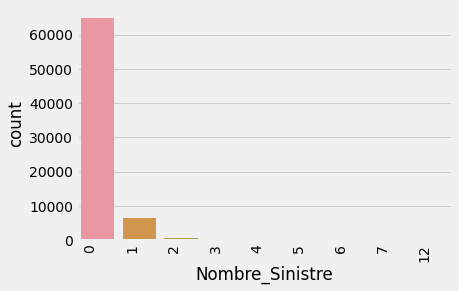

In [12]:
#usage_lib Usage
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Nombre_Sinistre', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

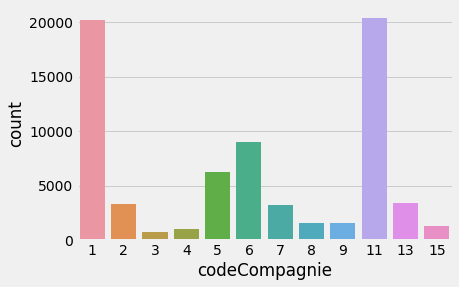

In [13]:
#Police_codeCompagnie
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='codeCompagnie', data=data)

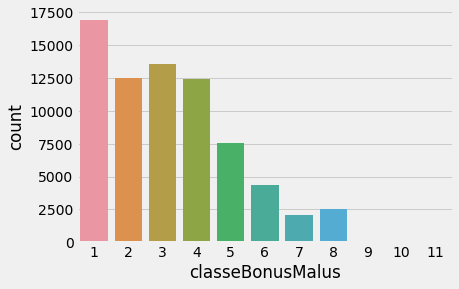

In [14]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='classeBonusMalus', data=data)

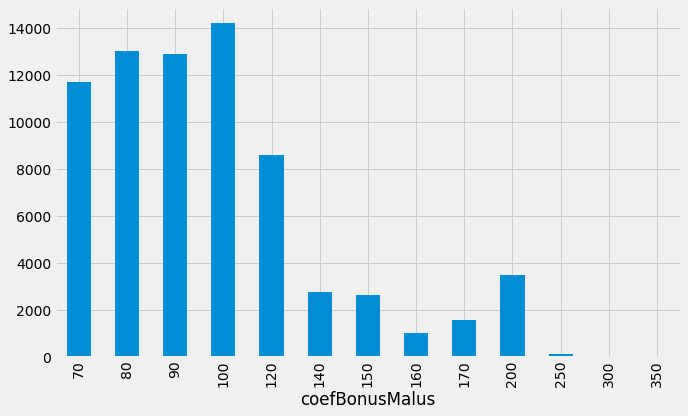

In [15]:

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = data.groupby('coefBonusMalus').coefBonusMalus.count().plot.bar(ylim=0)
ax.set_ylabel('')
plt.show()

In [16]:
#data['Vehicule_typeImmatriculation'].unique()

Vehicule type Immatriculation

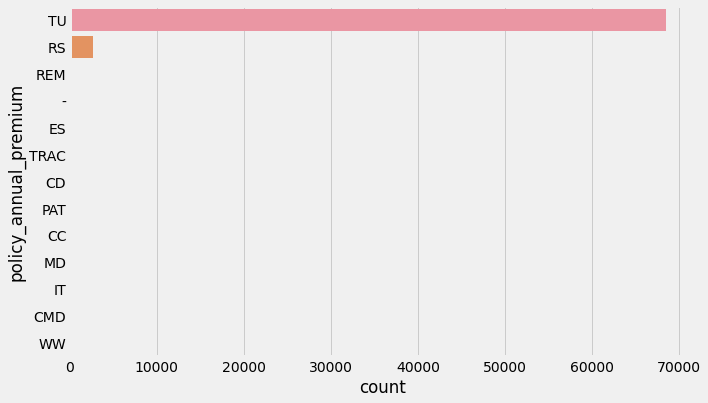

In [17]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'typeImmatriculation', data=data) 
ax.set_ylabel('policy_annual_premium')
plt.show()


#Data pre-processing


In [18]:
pd.unique(data["Usage"])

array(['Taxi', 'Louage', 'Transport Rural', 'Auto-Ecole',
       'Agricole1 véhicule dont le PTC < 3500 kg',
       'Utilitaire 1 véhicule dont le PTC < 3500 kg (y compris usage voirie)',
       'Privé et professionnel',
       'Utilitaire 2 véhicule dont le PTC > 3500 kg (y compris voirie)',
       'Transport public de marchandise (avec matière dangereuse et inflammable)',
       'Agricole 2 véhicule dont le PTC > 3500 kg',
       'Agricole Tracteur et Moissonneuse Batteuse',
       'Transport privé de personnes (personnel / enfants /membre d’association)',
       'autres usages (Ambulance / Corbillard / RC Garagiste / RC Trajet etc)',
       'Agences de Voyage et Hôtels', 'Engin de Chantiers', 'Location',
       'Transport public de voyageurs'], dtype=object)

In [19]:
data[["numPolice","naturePolice","typePolice","numImmatriculation","typeImmatriculation","energie","Marque_vehicule","Usage","numChassis"]].value_counts()

numPolice        naturePolice  typePolice  numImmatriculation  typeImmatriculation  energie  Marque_vehicule  Usage                                                                 numChassis       
﻿1001120000010   R             F           5736TU202           TU                   ESSENCE  AUDI             Privé et professionnel                                                WAUZZZF45JA048761    1
100876694        R             I           7228TU126           TU                   ESSENCE  FIAT             Privé et professionnel                                                9BD17218263243774    1
100876423        R             I           6632TU171           TU                   ESSENCE  KIA              Privé et professionnel                                                KNADN411AE6365126    1
100876530        R             I           7312TU171           TU                   GASOIL   VOLKSWAGEN       Privé et professionnel                                                WVWZZZ1KZCP03

In [20]:
data.max()

police_id                                                        2838847
vehicule_id                                                      1720398
assure_id                                                        1764729
souscripteur_id                                                  1603236
classeBonusMalus                                                      11
coefBonusMalus                                                       350
DATE_AFFECTATION                              2023-04-01 00:00:00.000000
bonus                                                                  1
date_Calcule                                  2020-12-01 00:00:00.000000
numChassis                                             ZLA84400001059598
puissanceFiscal                                                       68
numImmatriculation                                             TRAC99601
typeImmatriculation                                                   WW
energie                                            

In [21]:
X= data

In [22]:
data 

,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,coefBonusMalus,DATE_AFFECTATION,bonus,date_Calcule,numChassis,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,Marque_vehicule,Usage,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,dateEffetPolice,Nombre_Sinistre
0,32700,29293,26960,26960,3,100,2017-05-11 00:00:00.000000,0,2016-05-11 00:00:00.000000,VF1LB270F37539762,5.0,1554TU127,TU,ESSENCE,2017-10-05,2018-02-08 01:01:10.000000,RENAULT,Taxi,1,702,0,20115.0021718/3,R,I,2011-05-11,0
1,33350,28891,26553,26553,1,80,2017-08-18 00:00:00.000000,0,2016-08-18 00:00:00.000000,VF37BWJZT1P001378,6.0,1355TU96,TU,GASOIL,2017-10-05,2018-02-08 01:01:03.000000,PEUGEOT,Taxi,1,640,1,20065.0016148/1,R,I,2006-08-18,0
2,33486,29087,26754,26754,2,90,2016-09-20 00:00:00.000000,0,2016-09-20 00:00:00.000000,VF7FC8HZCAA588883,6.0,6149TU159,TU,GASOIL,2017-10-05,2018-02-08 01:01:06.000000,CITROEN,Taxi,1,681,0,20085.0370414/3,R,I,2008-09-20,0
3,33500,30651,28321,28321,1,80,2017-11-11 00:00:00.000000,0,2016-11-11 00:00:00.000000,WVWZZZ9NZ9Y071629,4.0,6011TU135,TU,GASOIL,2017-10-05,2018-02-08 03:20:10.000000,VOLKSWAGEN,Taxi,1,725,0,20085.0052688/7,R,I,2008-11-11,0
4,33736,30930,28600,28600,1,80,2016-11-14 00:00:00.000000,0,2016-11-14 00:00:00.000000,WVWZZZ6RZCY078450,4.0,9654TU154,TU,GASOIL,2017-10-05,2018-02-08 03:20:16.000000,VOLKSWAGEN,Taxi,1,628,0,20115.0058429/4,R,I,2011-11-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72034,2004473,29421,918174,835305,1,80,2017-10-28 00:00:00.000000,0,2019-10-01 00:00:00.000000,VF3XC9HUCBZ058619,7.0,9093TU155,TU,GASOIL,2017-10-05,2018-02-08 01:01:12.000000,PEUGEOT,Transport public de voyageurs,11,168,0,101032850,R,I,2016-10-28,0
72035,1345012,448413,424343,424347,4,120,2020-01-11 00:00:00.000000,1,2020-12-01 00:00:00.000000,HZB300004360,14.0,3795TU63,TU,GASOIL,2017-10-05,2018-02-20 15:44:40.000000,TOYOTA,Transport public de voyageurs,7,56,0,B1109974,R,I,2015-01-11,0
72036,1437288,1104617,607879,607885,3,100,2020-01-01 00:00:00.000000,1,2020-12-01 00:00:00.000000,BB210011007,14.0,3218TU55,TU,GASOIL,2017-10-05,2018-03-09 10:56:04.000000,TOYOTA,Transport public de voyageurs,7,39,0,B1129470,R,I,2015-05-15,0
72037,1886160,918128,895549,895559,1,80,2020-02-22 00:00:00.000000,1,2020-01-01 00:00:00.000000,WV1ZZZ7HZ9H152377,6.0,7582TU173,TU,GASOIL,2017-10-05,2018-02-27 20:32:17.000000,VOLKSWAGEN,Transport public de voyageurs,11,114,0,100495793,R,I,2008-02-22,0


In [23]:
categorical_feature_mask = data.dtypes==object
categorical_feature_mask

police_id              False
vehicule_id            False
assure_id              False
souscripteur_id        False
classeBonusMalus       False
coefBonusMalus         False
DATE_AFFECTATION        True
bonus                  False
date_Calcule            True
numChassis              True
puissanceFiscal        False
numImmatriculation      True
typeImmatriculation     True
energie                 True
dateInsertion           True
dateAjout               True
Marque_vehicule         True
Usage                   True
codeCompagnie          False
codeAgence             False
typeIntermediaire      False
numPolice               True
naturePolice            True
typePolice              True
dateEffetPolice         True
Nombre_Sinistre        False
dtype: bool

### Cyclical features encoding

In [24]:

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def cos(n):
    theta = 2 * pi * n
    return np.cos(theta)
def sin(n):
    theta = 2 * pi * n
    return np.sin(theta)
def get_cycles_sin_day(d):
    month = d.month - 1
    day = d.day - 1
    return sin(day / 30)
def get_cycles_cos_day(d):
    month = d.month - 1
    day = d.day - 1
    return cos(day / 30)
def get_cycles_sin_month(d):
    month = d.month - 1
    day = d.day - 1
    return sin(month / 12)
def get_cycles_cos_month(d):
    month = d.month - 1
    day = d.day - 1
    return cos(month / 12)
def get_cycles_year(d):
    return d.year

In [25]:
for i in ['DATE_AFFECTATION', 'date_Calcule', 'dateInsertion', 'dateAjout', 'dateEffetPolice']:
    X['day_'+i+'_sin']=pd.to_datetime(X[i]).apply(get_cycles_sin_day)
    X['day_'+i+'e_sin']=pd.to_datetime(X[i]).apply(get_cycles_cos_day)
    X['month_'+i+'_sin']=pd.to_datetime(X[i]).apply(get_cycles_sin_month)
    X['month_'+i+'_cos']=pd.to_datetime(X[i]).apply(get_cycles_cos_month)
    X['year_'+i]=pd.to_datetime(X[i]).apply(get_cycles_year)
X.drop(['DATE_AFFECTATION', 'date_Calcule', 'dateInsertion', 'dateAjout', 'dateEffetPolice','numPolice','numImmatriculation','numChassis'], inplace=True, axis=1)

In [26]:
X.dtypes

police_id                       int64
vehicule_id                     int64
assure_id                       int64
souscripteur_id                 int64
classeBonusMalus                int64
coefBonusMalus                  int64
bonus                           int64
puissanceFiscal               float64
typeImmatriculation            object
energie                        object
Marque_vehicule                object
Usage                          object
codeCompagnie                   int64
codeAgence                      int64
typeIntermediaire               int64
naturePolice                   object
typePolice                     object
Nombre_Sinistre                 int64
day_DATE_AFFECTATION_sin      float64
day_DATE_AFFECTATIONe_sin     float64
month_DATE_AFFECTATION_sin    float64
month_DATE_AFFECTATION_cos    float64
year_DATE_AFFECTATION           int64
day_date_Calcule_sin          float64
day_date_Calculee_sin         float64
month_date_Calcule_sin        float64
month_date_C

### Categorical feature encoding

In [27]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
xq=X[[ 'typeImmatriculation', 'energie','Marque_vehicule', 'Usage', 'naturePolice', 'typePolice']]
xenc = ohe.fit_transform(xq)
col_names = ohe.get_feature_names(['typeImmatriculation', 'energie','Marque_vehicule', 'Usage', 'naturePolice', 'typePolice'])
print(col_names)
encoded_frame=pd.DataFrame(xenc)
encoded_frame.columns =col_names
encoded_frame.index =xq.index
X.drop(columns =['typeImmatriculation', 'energie','Marque_vehicule', 'Usage', 'naturePolice', 'typePolice'], axis=1, inplace=True)
X= pd.concat([X,encoded_frame],axis=1)

['typeImmatriculation_-' 'typeImmatriculation_CC' 'typeImmatriculation_CD'
 'typeImmatriculation_CMD' 'typeImmatriculation_ES'
 'typeImmatriculation_IT' 'typeImmatriculation_MD'
 'typeImmatriculation_PAT' 'typeImmatriculation_REM'
 'typeImmatriculation_RS' 'typeImmatriculation_TRAC'
 'typeImmatriculation_TU' 'typeImmatriculation_WW' 'energie_0'
 'energie_ESS-GAZ GPL' 'energie_ESSENCE' 'energie_GASOIL'
 'Marque_vehicule_AGCO-CORPORATION' 'Marque_vehicule_ALFA-LANCIA'
 'Marque_vehicule_ALFA-ROMEO' 'Marque_vehicule_AM-SUD'
 'Marque_vehicule_ASCA' 'Marque_vehicule_ASTRA' 'Marque_vehicule_AUDI'
 'Marque_vehicule_AUTOBIANCHI' 'Marque_vehicule_AVIA'
 'Marque_vehicule_BAIC YINXIANG' 'Marque_vehicule_BAOLI'
 'Marque_vehicule_BEIJING' 'Marque_vehicule_BERLIET' 'Marque_vehicule_BMW'
 'Marque_vehicule_BOBCAT' 'Marque_vehicule_BSL' 'Marque_vehicule_BSLT'
 'Marque_vehicule_CADILLAC' 'Marque_vehicule_CALABRESE'
 'Marque_vehicule_CASE' 'Marque_vehicule_CATERPILLAR'
 'Marque_vehicule_CHEREAU' 'Marque_v

In [28]:
import pickle
outfile = open("OneHotEncoder_bonusclass.p",'wb')
pickle.dump(ohe,outfile)

In [29]:
X

,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,coefBonusMalus,bonus,puissanceFiscal,codeCompagnie,codeAgence,typeIntermediaire,Nombre_Sinistre,day_DATE_AFFECTATION_sin,day_DATE_AFFECTATIONe_sin,month_DATE_AFFECTATION_sin,month_DATE_AFFECTATION_cos,year_DATE_AFFECTATION,day_date_Calcule_sin,day_date_Calculee_sin,month_date_Calcule_sin,month_date_Calcule_cos,year_date_Calcule,day_dateInsertion_sin,day_dateInsertione_sin,month_dateInsertion_sin,month_dateInsertion_cos,year_dateInsertion,day_dateAjout_sin,day_dateAjoute_sin,month_dateAjout_sin,month_dateAjout_cos,year_dateAjout,day_dateEffetPolice_sin,day_dateEffetPolicee_sin,month_dateEffetPolice_sin,month_dateEffetPolice_cos,year_dateEffetPolice,typeImmatriculation_-,typeImmatriculation_CC,typeImmatriculation_CD,...,Marque_vehicule_TEU,Marque_vehicule_TIRSAN,Marque_vehicule_TITAN,Marque_vehicule_TOYOTA,Marque_vehicule_TRAILOR,Marque_vehicule_TRANSMA NUT,Marque_vehicule_TUNICAR,Marque_vehicule_TUNICOM,Marque_vehicule_UNIC,Marque_vehicule_VOLKSWAGEN,Marque_vehicule_VOLVO,Marque_vehicule_WALLYSCAR,Marque_vehicule_WECAN,Marque_vehicule_XCMG,Marque_vehicule_XGMA,Marque_vehicule_YALE,Marque_vehicule_YTO,Marque_vehicule_ZHEJIANG,Marque_vehicule_ZORZI,Usage_Agences de Voyage et Hôtels,Usage_Agricole 2 véhicule dont le PTC > 3500 kg,Usage_Agricole Tracteur et Moissonneuse Batteuse,Usage_Agricole1 véhicule dont le PTC < 3500 kg,Usage_Auto-Ecole,Usage_Engin de Chantiers,Usage_Location,Usage_Louage,Usage_Privé et professionnel,Usage_Taxi,Usage_Transport Rural,Usage_Transport privé de personnes (personnel / enfants /membre d’association),Usage_Transport public de marchandise (avec matière dangereuse et inflammable),Usage_Transport public de voyageurs,Usage_Utilitaire 1 véhicule dont le PTC < 3500 kg (y compris usage voirie),Usage_Utilitaire 2 véhicule dont le PTC > 3500 kg (y compris voirie),Usage_autres usages (Ambulance / Corbillard / RC Garagiste / RC Trajet etc),naturePolice_R,naturePolice_T,typePolice_F,typePolice_I
0,32700,29293,26960,26960,3,100,0,5.0,1,702,0,0,8.660254e-01,-0.500000,0.866025,-5.000000e-01,2017,0.866025,-0.500000,0.866025,-5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,8.660254e-01,-0.500000,0.866025,-5.000000e-01,2011,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,33350,28891,26553,26553,1,80,0,6.0,1,640,1,0,-4.067366e-01,-0.913545,-0.500000,-8.660254e-01,2017,-0.406737,-0.913545,-0.500000,-8.660254e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-4.067366e-01,-0.913545,-0.500000,-8.660254e-01,2006,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33486,29087,26754,26754,2,90,0,6.0,1,681,0,0,-7.431448e-01,-0.669131,-0.866025,-5.000000e-01,2016,-0.743145,-0.669131,-0.866025,-5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-7.431448e-01,-0.669131,-0.866025,-5.000000e-01,2008,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,33500,30651,28321,28321,1,80,0,4.0,1,725,0,0,8.660254e-01,-0.500000,-0.866025,5.000000e-01,2017,0.866025,-0.500000,-0.866025,5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,8.660254e-01,-0.500000,-0.866025,5.000000e-01,2008,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,33736,30930,28600,28600,1,80,0,4.0,1,628,0,0,4.067366e-01,-0.913545,-0.866025,5.000000e-01,2016,0.406737,-0.913545,-0.866025,5.000000e-01,2016,0.743145,0.6

In [30]:
data

,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,coefBonusMalus,bonus,puissanceFiscal,codeCompagnie,codeAgence,typeIntermediaire,Nombre_Sinistre,day_DATE_AFFECTATION_sin,day_DATE_AFFECTATIONe_sin,month_DATE_AFFECTATION_sin,month_DATE_AFFECTATION_cos,year_DATE_AFFECTATION,day_date_Calcule_sin,day_date_Calculee_sin,month_date_Calcule_sin,month_date_Calcule_cos,year_date_Calcule,day_dateInsertion_sin,day_dateInsertione_sin,month_dateInsertion_sin,month_dateInsertion_cos,year_dateInsertion,day_dateAjout_sin,day_dateAjoute_sin,month_dateAjout_sin,month_dateAjout_cos,year_dateAjout,day_dateEffetPolice_sin,day_dateEffetPolicee_sin,month_dateEffetPolice_sin,month_dateEffetPolice_cos,year_dateEffetPolice
0,32700,29293,26960,26960,3,100,0,5.0,1,702,0,0,8.660254e-01,-0.500000,0.866025,-5.000000e-01,2017,0.866025,-0.500000,0.866025,-5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,8.660254e-01,-0.500000,0.866025,-5.000000e-01,2011
1,33350,28891,26553,26553,1,80,0,6.0,1,640,1,0,-4.067366e-01,-0.913545,-0.500000,-8.660254e-01,2017,-0.406737,-0.913545,-0.500000,-8.660254e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-4.067366e-01,-0.913545,-0.500000,-8.660254e-01,2006
2,33486,29087,26754,26754,2,90,0,6.0,1,681,0,0,-7.431448e-01,-0.669131,-0.866025,-5.000000e-01,2016,-0.743145,-0.669131,-0.866025,-5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-7.431448e-01,-0.669131,-0.866025,-5.000000e-01,2008
3,33500,30651,28321,28321,1,80,0,4.0,1,725,0,0,8.660254e-01,-0.500000,-0.866025,5.000000e-01,2017,0.866025,-0.500000,-0.866025,5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,8.660254e-01,-0.500000,-0.866025,5.000000e-01,2008
4,33736,30930,28600,28600,1,80,0,4.0,1,628,0,0,4.067366e-01,-0.913545,-0.866025,5.000000e-01,2016,0.406737,-0.913545,-0.866025,5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,4.067366e-01,-0.913545,-0.866025,5.000000e-01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72034,2004473,29421,918174,835305,1,80,0,7.0,11,168,0,0,-5.877853e-01,0.809017,-1.000000,-1.836970e-16,2017,0.000000,1.000000,-1.000000,-1.836970e-16,2019,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-5.877853e-01,0.809017,-1.000000,-1.836970e-16,2016
72035,1345012,448413,424343,424347,4,120,1,14.0,7,56,0,0,8.660254e-01,-0.500000,0.000000,1.000000e+00,2020,0.000000,1.000000,-0.500000,8.660254e-01,2020,0.743145,0.669131,-1.0,-1.836970e-16,2017,-0.743145,-0.669131,0.500000,0.866025,2018,8.660254e-01,-0.500000,0.000000,1.000000e+00,2015
72036,1437288,1104617,607879,607885,3,100,1,14.0,7,39,0,0,0.000000e+00,1.000000,0.000000,1.000000e+00,2020,0.000000,1.000000,-0.500000,8.660254e-01,2020,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,-0.104528,0.866025,0.500000,2018,2.079117e-01,-0.978148,0.866025,-5.000000e-01,2015
72037,1886160,918128,895549,895559,1,80,1,6.0,11,114,0,0,-9.510565e-01,-0.309017,0.500000,8.660254e-01,2020,0.000000,1.000000,0.000000,1.000000e+00,2020,0.743145,0.669131,-1.0,-1.836970e-16,2017,-0.743145,0.669131,0.500000,0.866025,2018,-9.510565e-01,-0.309017,0.500000,8.660254e-01,2008


In [31]:
data.max()

police_id                     2.838847e+06
vehicule_id                   1.720398e+06
assure_id                     1.764729e+06
souscripteur_id               1.603236e+06
classeBonusMalus              1.100000e+01
coefBonusMalus                3.500000e+02
bonus                         1.000000e+00
puissanceFiscal               6.800000e+01
codeCompagnie                 1.500000e+01
codeAgence                    1.040030e+05
typeIntermediaire             1.000000e+00
Nombre_Sinistre               1.200000e+01
day_DATE_AFFECTATION_sin      9.945219e-01
day_DATE_AFFECTATIONe_sin     1.000000e+00
month_DATE_AFFECTATION_sin    1.000000e+00
month_DATE_AFFECTATION_cos    1.000000e+00
year_DATE_AFFECTATION         2.023000e+03
day_date_Calcule_sin          9.945219e-01
day_date_Calculee_sin         1.000000e+00
month_date_Calcule_sin        1.000000e+00
month_date_Calcule_cos        1.000000e+00
year_date_Calcule             2.020000e+03
day_dateInsertion_sin         9.945219e-01
day_dateIns

In [32]:
X['classeBonusMalus'].unique()

array([ 3,  1,  2,  4,  5,  6,  7,  8, 11, 10,  9])

In [33]:
data

,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,coefBonusMalus,bonus,puissanceFiscal,codeCompagnie,codeAgence,typeIntermediaire,Nombre_Sinistre,day_DATE_AFFECTATION_sin,day_DATE_AFFECTATIONe_sin,month_DATE_AFFECTATION_sin,month_DATE_AFFECTATION_cos,year_DATE_AFFECTATION,day_date_Calcule_sin,day_date_Calculee_sin,month_date_Calcule_sin,month_date_Calcule_cos,year_date_Calcule,day_dateInsertion_sin,day_dateInsertione_sin,month_dateInsertion_sin,month_dateInsertion_cos,year_dateInsertion,day_dateAjout_sin,day_dateAjoute_sin,month_dateAjout_sin,month_dateAjout_cos,year_dateAjout,day_dateEffetPolice_sin,day_dateEffetPolicee_sin,month_dateEffetPolice_sin,month_dateEffetPolice_cos,year_dateEffetPolice
0,32700,29293,26960,26960,3,100,0,5.0,1,702,0,0,8.660254e-01,-0.500000,0.866025,-5.000000e-01,2017,0.866025,-0.500000,0.866025,-5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,8.660254e-01,-0.500000,0.866025,-5.000000e-01,2011
1,33350,28891,26553,26553,1,80,0,6.0,1,640,1,0,-4.067366e-01,-0.913545,-0.500000,-8.660254e-01,2017,-0.406737,-0.913545,-0.500000,-8.660254e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-4.067366e-01,-0.913545,-0.500000,-8.660254e-01,2006
2,33486,29087,26754,26754,2,90,0,6.0,1,681,0,0,-7.431448e-01,-0.669131,-0.866025,-5.000000e-01,2016,-0.743145,-0.669131,-0.866025,-5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-7.431448e-01,-0.669131,-0.866025,-5.000000e-01,2008
3,33500,30651,28321,28321,1,80,0,4.0,1,725,0,0,8.660254e-01,-0.500000,-0.866025,5.000000e-01,2017,0.866025,-0.500000,-0.866025,5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,8.660254e-01,-0.500000,-0.866025,5.000000e-01,2008
4,33736,30930,28600,28600,1,80,0,4.0,1,628,0,0,4.067366e-01,-0.913545,-0.866025,5.000000e-01,2016,0.406737,-0.913545,-0.866025,5.000000e-01,2016,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,4.067366e-01,-0.913545,-0.866025,5.000000e-01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72034,2004473,29421,918174,835305,1,80,0,7.0,11,168,0,0,-5.877853e-01,0.809017,-1.000000,-1.836970e-16,2017,0.000000,1.000000,-1.000000,-1.836970e-16,2019,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,0.104528,0.500000,0.866025,2018,-5.877853e-01,0.809017,-1.000000,-1.836970e-16,2016
72035,1345012,448413,424343,424347,4,120,1,14.0,7,56,0,0,8.660254e-01,-0.500000,0.000000,1.000000e+00,2020,0.000000,1.000000,-0.500000,8.660254e-01,2020,0.743145,0.669131,-1.0,-1.836970e-16,2017,-0.743145,-0.669131,0.500000,0.866025,2018,8.660254e-01,-0.500000,0.000000,1.000000e+00,2015
72036,1437288,1104617,607879,607885,3,100,1,14.0,7,39,0,0,0.000000e+00,1.000000,0.000000,1.000000e+00,2020,0.000000,1.000000,-0.500000,8.660254e-01,2020,0.743145,0.669131,-1.0,-1.836970e-16,2017,0.994522,-0.104528,0.866025,0.500000,2018,2.079117e-01,-0.978148,0.866025,-5.000000e-01,2015
72037,1886160,918128,895549,895559,1,80,1,6.0,11,114,0,0,-9.510565e-01,-0.309017,0.500000,8.660254e-01,2020,0.000000,1.000000,0.000000,1.000000e+00,2020,0.743145,0.669131,-1.0,-1.836970e-16,2017,-0.743145,0.669131,0.500000,0.866025,2018,-9.510565e-01,-0.309017,0.500000,8.660254e-01,2008


###Dataset Splitting

In [34]:
all_X = X.drop(['classeBonusMalus'], axis=1)
all_y = X['classeBonusMalus']
train_X, test_X, train_y, test_y = train_test_split(
   all_X, all_y, test_size=0.2,random_state=0)

# Machine learning models

In [35]:
X=data

##Decision Tree Classifier

In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
predictions_dt = decision_tree.predict(test_X)
acc_decision_tree = accuracy_score(test_y, predictions_dt)
acc_decision_tree

0.9960438645197113

In [37]:
with open("acc_decision_tree.dill", "wb") as f:
        dill.dump(decision_tree, f, protocol=pickle.HIGHEST_PROTOCOL)

## Logistic Regression

In [38]:
lr = LogisticRegression()

In [39]:
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.23689953935998814

In [40]:
lr.fit(train_X, train_y)
predictions_lr = lr.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
accuracy = accuracy_score(test_y, predictions_lr)

In [42]:
accuracy

0.23903387007218213

##K Neighbors Classifier

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)
predictions_knn = knn.predict(test_X)
acc_knn = accuracy_score(test_y, predictions_knn)
acc_knn

0.292823431426985

##GaussianNB

In [44]:
gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
predictions = gaussian.predict(test_X)
acc_gaussian = accuracy_score(test_y, predictions)
acc_gaussian

0.4290671848972793

##Perceptron

In [45]:
perceptron = Perceptron()
perceptron.fit(train_X, train_y)
predictions = perceptron.predict(test_X)
acc_perceptron = accuracy_score(test_y, predictions)
acc_perceptron

0.19156024430871738

##SGD Classifier

In [46]:
sgd = SGDClassifier()
sgd.fit(train_X, train_y)
predictions = sgd.predict(test_X)
acc_sgd = accuracy_score(test_y, predictions)
acc_sgd

0.19024153248195447

##Decision Tree Classifier

In [47]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
predictions_dt = decision_tree.predict(test_X)
acc_decision_tree = accuracy_score(test_y, predictions_dt)
acc_decision_tree

0.9957662409772349

##DecisionTreeClassifier bagging

In [48]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)
tree = tree.DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree, all_X, all_y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.99597446 0.99736258 0.99666852 0.99569684 0.99625208 0.99569684
 0.99611327 0.99652971 0.99722376 0.9959739 ]


In [49]:
(np.mean(score))
bagging_cart =np.mean(score)
bagging_cart

0.9963491945294249

In [50]:
train_X.columns

Index(['police_id', 'vehicule_id', 'assure_id', 'souscripteur_id',
       'coefBonusMalus', 'bonus', 'puissanceFiscal', 'codeCompagnie',
       'codeAgence', 'typeIntermediaire',
       ...
       'Usage_Transport privé de personnes (personnel / enfants /membre d’association)',
       'Usage_Transport public de marchandise (avec matière dangereuse et inflammable)',
       'Usage_Transport public de voyageurs',
       'Usage_Utilitaire 1 véhicule dont le PTC < 3500 kg (y compris usage voirie)',
       'Usage_Utilitaire 2 véhicule dont le PTC > 3500 kg (y compris voirie)',
       'Usage_autres usages (Ambulance / Corbillard / RC Garagiste / RC Trajet etc)',
       'naturePolice_R', 'naturePolice_T', 'typePolice_F', 'typePolice_I'],
      dtype='object', length=277)

##Random Forest Classifier

In [51]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)
predictions_rf = random_forest.predict(test_X)
print(random_forest.score(train_X, train_y))
acc_random_forest = accuracy_score(test_y, predictions_rf)
acc_random_forest

1.0


0.8756246529705719

## Bagging Classifier

In [52]:

# Bagged Decision Trees for Classification
X = all_X
Y = all_y
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9950027723811482


##  Random Forest Classification

In [53]:
# Random Forest Classification
X = all_X
Y = all_y
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.6238705851863346


## AdaBoost Classification

In [54]:
X = all_X
Y = all_y
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.2986027033279289


## Stochastic Gradient Boosting Classification

In [55]:
X = all_X
Y = all_y
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9931982135736368


#Results

In [57]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',
              'Decision Tree','AdaBoost','Ensemble voting','bagging CART'],
    'Score': [accuracy, acc_knn, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree ,0.3218469725989639 ,0.2689627608823176,bagging_cart ]})
models.sort_values(by="Score",ascending=False)

,Model,Score
9,bagging CART,0.996349
6,Decision Tree,0.995766
2,Random Forest,0.875625
3,Naive Bayes,0.429067
7,AdaBoost,0.321847
1,KNN,0.292823
8,Ensemble voting,0.268963
0,Logistic Regression,0.239034
4,Perceptron,0.191560
5,Stochastic Gradient Decent,0.190242


In [58]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

In [59]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, all_X, all_y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()

In [60]:
num_folds = 7

In [61]:
skfold = ShuffleSplit(random_state=7)

In [62]:
clf_bgr_CC = BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = 40)
bgr_acc = cross_val_score(clf_bgr_CC, train_X, train_y, cv = skfold)

print (bgr_acc.mean())


0.9916942133891945


In [63]:
bgr_acc

array([0.98979497, 0.98909238, 0.99493149, 0.99092043, 0.9924501 ,
       0.99137113, 0.99455922, 0.99206236, 0.98870646, 0.9930536 ])

In [64]:
bgr= bgr_acc.mean()

In [65]:
clf_bgr_CC.fit(train_X, train_y)
Y_pred_CC = clf_bgr_CC.predict(test_X) 

In [66]:
print (Y_pred_CC)

[7. 4. 6. ... 1. 3. 4.]


In [69]:
outfile = open("model_bonusmalus.p",'wb')
pickle.dump(clf_bgr_CC,outfile)